<a href="https://colab.research.google.com/github/pravin-raut/TimeSeries_USD-EUR_WithOilImpact/blob/Master/01_Currency_%26_Oil_Forecast_Analysis%26Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Install necessary libraries

In [44]:
!pip install quandl
!pip install yfinance

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime,timedelta
import json
import quandl

In [46]:
import urllib.request

file_path = "https://raw.githubusercontent.com/pravin-raut/MachineLearning/Master/dissertation/Config/Config_Git.json"

with urllib.request.urlopen(file_path) as infile:
  data = json.load(infile)

  api_key=data["nasdaq"]["api_key"]
quandl.ApiConfig.api_key = api_key


In [47]:
FirstDay='2019-01-01'
LastDay='2023-07-10'

In [48]:

def getDataFromAPI(API,symbol,start_date,end_date):

  if API=="YFinance":
    # Create a ticker object
    ticker = yf.Ticker(symbol)
    # Download historical data
    data = ticker.history(period="1d", start=start_date, end=end_date)

  if API=="Nasdaq":
    data = quandl.get(symbol,start_date=start_date,end_date=end_date)


  return data

# Reading Opec Oil Data from Nasdaq




In [49]:
df_Oil_InUSD=getDataFromAPI("Nasdaq","OPEC/ORB",FirstDay,LastDay).reset_index()
df_Oil_InUSD['Date'] = pd.to_datetime(df_Oil_InUSD['Date']).dt.date
df_Oil_InUSD.set_index('Date', inplace=True)
df_Oil_InUSD.head()

,Value
Date,
2019-01-02,52.14
2019-01-03,52.93
2019-01-04,55.13
2019-01-07,56.42
2019-01-08,56.09


In [50]:
df_Oil_InUSD.describe()

,Value
count,1167.000000
mean,70.059109
std,22.035968
min,12.220000
25%,59.460000
50%,68.840000
75%,82.045000
max,128.270000


In [51]:
df_Oil_InUSD.isnull().sum()

Value    0
dtype: int64

In [52]:
df_Oil_InUSD=df_Oil_InUSD.asfreq('b')


In [53]:
df_Oil_InUSD.isnull().sum()

Value    12
dtype: int64

# Fill Missing Values

In [54]:
df_Oil_InUSD['Actual_Oil_Price_t']=df_Oil_InUSD.Value.fillna(method='bfill')
df_Oil_InUSD=df_Oil_InUSD[['Actual_Oil_Price_t']]
df_Oil_InUSD.isnull().sum()

Actual_Oil_Price_t    0
dtype: int64

In [55]:
df_Oil_InUSD.head(5)

,Actual_Oil_Price_t
Date,
2019-01-02,52.14
2019-01-03,52.93
2019-01-04,55.13
2019-01-07,56.42
2019-01-08,56.09


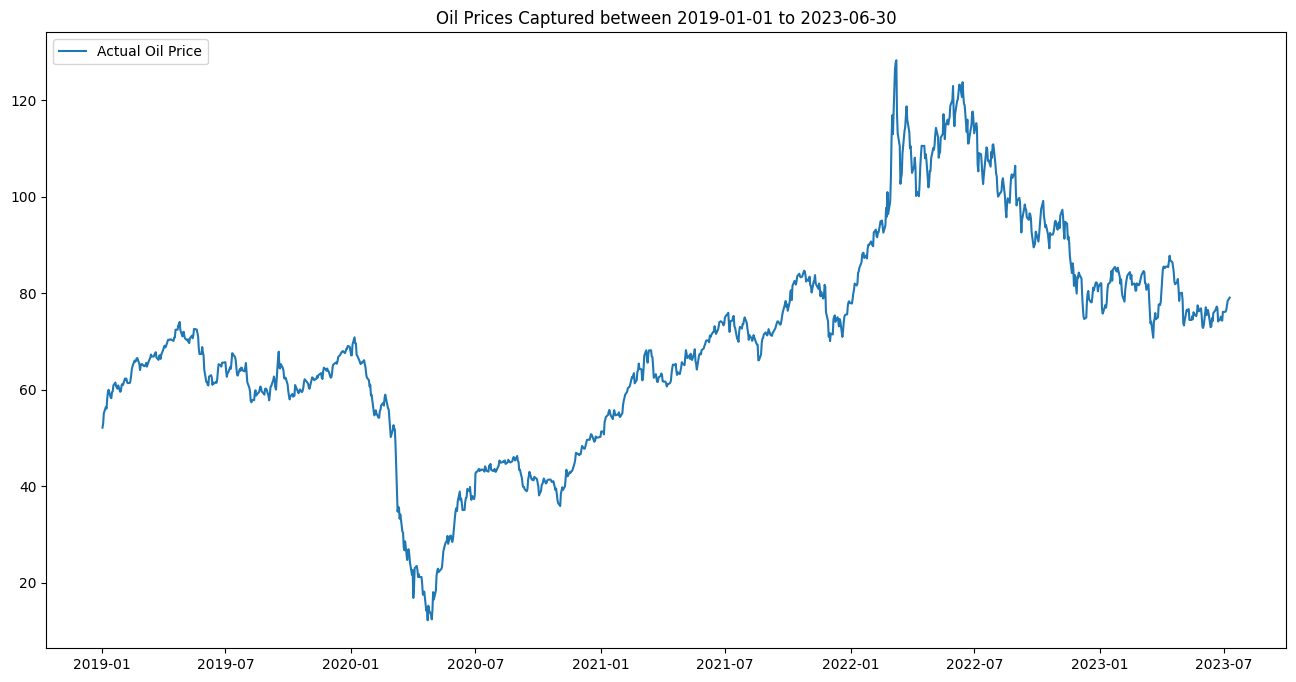

In [56]:
plt.figure(figsize=(16,8))
plt.plot(df_Oil_InUSD['Actual_Oil_Price_t'],label="Actual Oil Price")
plt.title("Oil Prices Captured between 2019-01-01 to 2023-06-30")
plt.legend(loc="upper left")
plt.show()


# Reading Exchange Rate Data from Yahoo Finance


In [57]:
df_EUR_USD=getDataFromAPI("YFinance","EURUSD=X",FirstDay,LastDay).reset_index()
df_EUR_USD['Date'] = pd.to_datetime(df_EUR_USD['Date']).dt.date
df_EUR_USD.set_index('Date', inplace=True)
df_EUR_USD.head(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-01-01,1.149425,1.155001,1.146500,1.149306,0,0.0,0.0
2019-01-02,1.146132,1.149700,1.134572,1.146171,0,0.0,0.0
2019-01-03,1.131734,1.140914,1.131734,1.131811,0,0.0,0.0
2019-01-04,1.139095,1.141774,1.134816,1.139108,0,0.0,0.0
2019-01-07,1.141292,1.147447,1.140524,1.141044,0,0.0,0.0
2019-01-08,1.147934,1.148633,1.142465,1.147974,0,0.0,0.0
2019-01-09,1.145725,1.154015,1.144165,1.145607,0,0.0,0.0
2019-01-10,1.155522,1.157140,1.151145,1.155495,0,0.0,0.0
2019-01-11,1.151517,1.153900,1.145974,1.151013,0,0.0,0.0


In [58]:
df_EUR_USD[['Close']].describe()

,Close
count,1178.000000
mean,1.119770
std,0.057962
min,0.959619
25%,1.085891
50%,1.119827
75%,1.170186
max,1.234111


In [59]:
df_EUR_USD.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [60]:
df_EUR_USD=df_EUR_USD.asfreq('b')

df_EUR_USD.Close.isnull().sum()

1

# Fill Missing Values

In [61]:
df_EUR_USD.Close=df_EUR_USD.Close.fillna(method='bfill')


In [62]:
df_EUR_USD['Actual_EUR_USD_Price_t']=df_EUR_USD[['Close']]
df_EUR_USD=df_EUR_USD[['Actual_EUR_USD_Price_t']]
df_EUR_USD.head(5)

,Actual_EUR_USD_Price_t
Date,
2019-01-01,1.149306
2019-01-02,1.146171
2019-01-03,1.131811
2019-01-04,1.139108
2019-01-07,1.141044


In [63]:
df_EUR_USD.isnull().sum()

Actual_EUR_USD_Price_t    0
dtype: int64

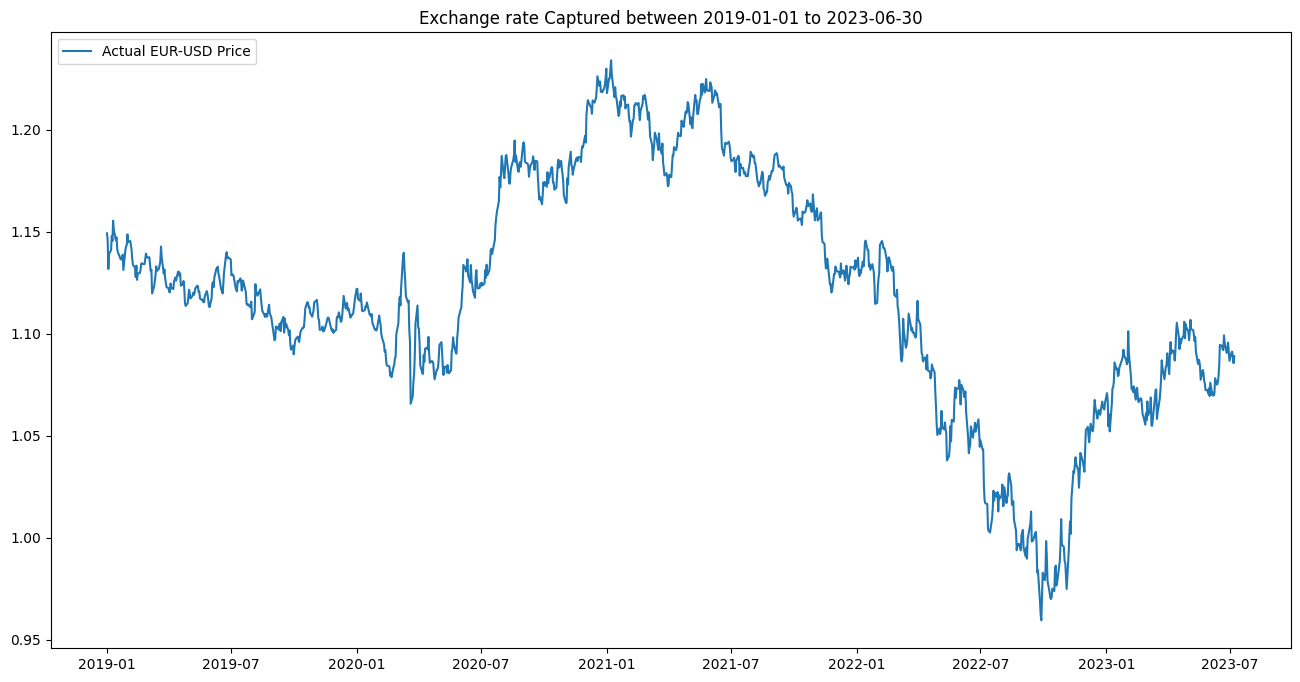

In [64]:
plt.figure(figsize=(16,8))
plt.plot(df_EUR_USD['Actual_EUR_USD_Price_t'],label="Actual EUR-USD Price")
plt.title("Exchange rate Captured between 2019-01-01 to 2023-06-30")
plt.legend(loc="upper left")
plt.show()


In [65]:
def compare_plots(col1, col2, label1, label2, title):
    plt.figure(figsize=(16,8))
    plt.plot(col1,label=label1)
    plt.plot(col2,label=label2)
    plt.title(title)
    plt.legend(loc="upper left")
    plt.show()


# Standardizing data frame in order to compare

In [66]:
import matplotlib.pyplot as plt
import pandas as pd

df_EUR_USD['EUR_USD_Price_standardized'] = (df_EUR_USD['Actual_EUR_USD_Price_t'] - df_EUR_USD['Actual_EUR_USD_Price_t'].mean()) / df_EUR_USD['Actual_EUR_USD_Price_t'].std()
df_Oil_InUSD['Oil_Price_standardized'] = (df_Oil_InUSD['Actual_Oil_Price_t'] - df_Oil_InUSD['Actual_Oil_Price_t'].mean()) / df_Oil_InUSD['Actual_Oil_Price_t'].std()



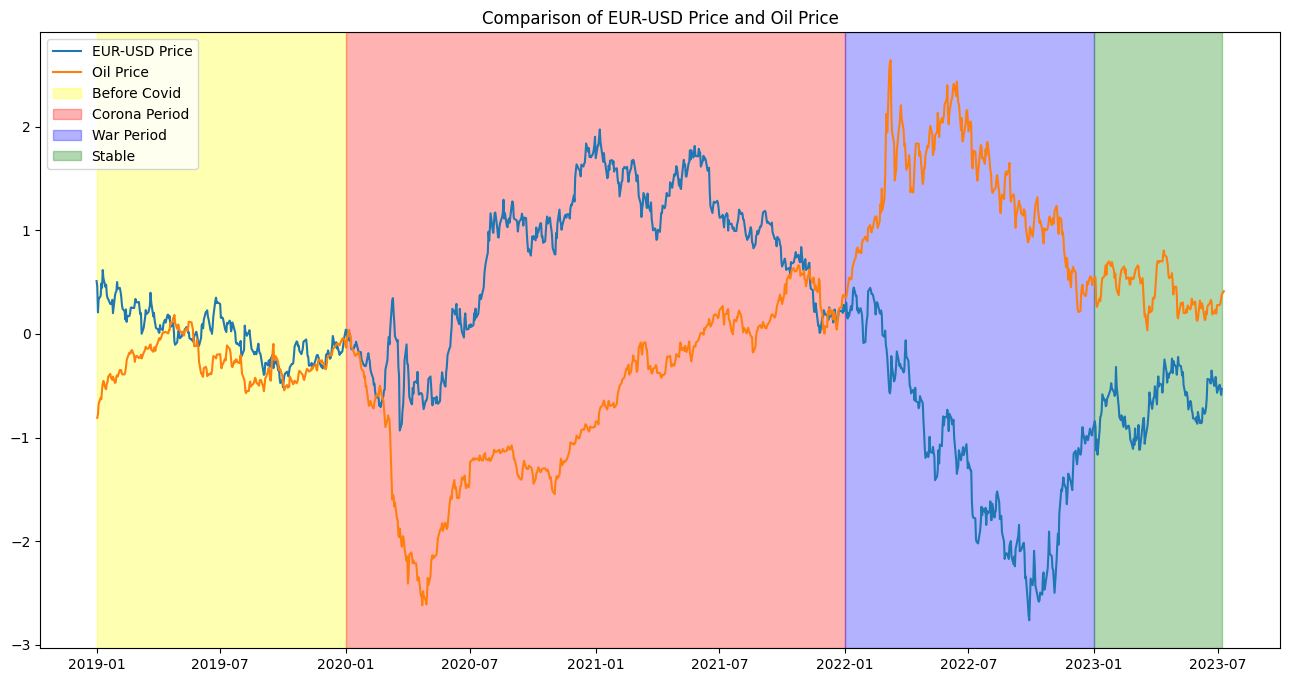

In [67]:
plt.figure(figsize=(16,8))
plt.plot(df_EUR_USD['EUR_USD_Price_standardized'], label="EUR-USD Price")
plt.plot(df_Oil_InUSD['Oil_Price_standardized'], label="Oil Price")
plt.axvspan(df_EUR_USD.index.min(), pd.to_datetime('2020-01-01'), color='yellow', alpha=0.3, label='Before Covid')
plt.axvspan(pd.to_datetime('2020-01-01'), pd.to_datetime('2022-01-01'), color='red', alpha=0.3, label='Corona Period')
# War period
plt.axvspan(pd.to_datetime('2022-01-01'), pd.to_datetime('2023-01-01'), color='blue', alpha=0.3, label='War Period')
# Stable
plt.axvspan(pd.to_datetime('2023-01-01'), df_EUR_USD.index.max(), color='green', alpha=0.3, label='Stable')
plt.title('Comparison of EUR-USD Price and Oil Price')
plt.legend(loc="upper left")

plt.show()



In [68]:
def generate_shift_columns_back(df, column_name, min_shift, max_shift, suffix=None):
    if suffix:
        base_name = column_name.split(suffix)[0] # Obtain the base column name
        for i in range(min_shift, max_shift + 1):
            new_col_name = f'{base_name}-{i}{suffix}'
            df[new_col_name] = df[column_name].shift(i)
    else:
        for i in range(min_shift, max_shift + 1):
            df[f'{column_name}-{i}'] = df[column_name].shift(i)
    return df


In [69]:
def generate_shift_columns_front(df, column_name, min_shift, max_shift, suffix=None):
    if suffix:
        base_name = column_name.split(suffix)[0] # Obtain the base column name
        for i in range(min_shift, max_shift + 1):
            new_col_name = f'{base_name}+{i}{suffix}'
            df[new_col_name] = df[column_name].shift(-i)
            print(new_col_name)
    else:
        for i in range(min_shift, max_shift + 1):
            df[f'{column_name}+{i}'] = df[column_name].shift(-i)
    return df


In [70]:
df_oil_currency = df_Oil_InUSD.join(df_EUR_USD, how='inner')
df_oil_currency

,Actual_Oil_Price_t,Oil_Price_standardized,Actual_EUR_USD_Price_t,EUR_USD_Price_standardized
Date,,,,
2019-01-02,52.14,-0.810091,1.146171,0.455745
2019-01-03,52.93,-0.774277,1.131811,0.207882
2019-01-04,55.13,-0.674544,1.139108,0.333831
2019-01-07,56.42,-0.616064,1.141044,0.367258
2019-01-08,56.09,-0.631024,1.147974,0.486857
...,...,...,...,...
2023-07-03,76.12,0.277001,1.090750,-0.500815
2023-07-04,76.18,0.279721,1.091310,-0.491159
2023-07-05,76.61,0.299215,1.088495,-0.539750


# Correlation Matrix for Oil Price and Exchange Price

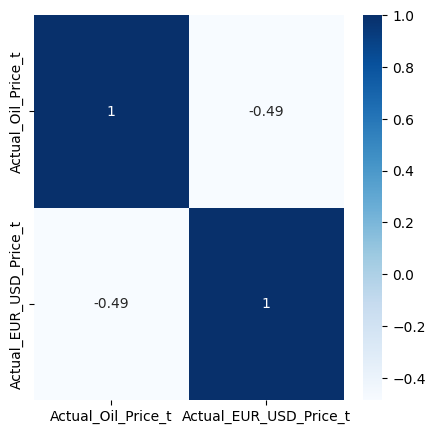

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

columns_of_interest = ['Actual_Oil_Price_t','Actual_EUR_USD_Price_t']
corr = df_oil_currency[columns_of_interest].corr()
f, ax = plt.subplots(figsize=(5, 5))

sns.heatmap(corr,   annot=True,cmap='Blues')

plt.show()


#Create Feature Columns
1. t,t-1,t-2,t-3,t-4 as Feature Columns
2. t+1 For Prediction and Comparison
3. t+2,t+3,t+4,t+5 for Comparison with Predicted values

In [72]:
generate_shift_columns_back(df_oil_currency, 'Actual_EUR_USD_Price_t', 1, 4)
generate_shift_columns_back(df_oil_currency, 'Actual_Oil_Price_t', 1, 4)
generate_shift_columns_front(df_oil_currency, 'Actual_EUR_USD_Price_t', 1, 5)
generate_shift_columns_front(df_oil_currency, 'Actual_Oil_Price_t', 1, 5)
df_oil_currency

,Actual_Oil_Price_t,Oil_Price_standardized,Actual_EUR_USD_Price_t,EUR_USD_Price_standardized,Actual_EUR_USD_Price_t-1,Actual_EUR_USD_Price_t-2,Actual_EUR_USD_Price_t-3,Actual_EUR_USD_Price_t-4,Actual_Oil_Price_t-1,Actual_Oil_Price_t-2,...,Actual_EUR_USD_Price_t+1,Actual_EUR_USD_Price_t+2,Actual_EUR_USD_Price_t+3,Actual_EUR_USD_Price_t+4,Actual_EUR_USD_Price_t+5,Actual_Oil_Price_t+1,Actual_Oil_Price_t+2,Actual_Oil_Price_t+3,Actual_Oil_Price_t+4,Actual_Oil_Price_t+5
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,52.14,-0.810091,1.146171,0.455745,NaN,NaN,NaN,NaN,NaN,NaN,...,1.131811,1.139108,1.141044,1.147974,1.145607,52.93,55.13,56.42,56.09,58.22
2019-01-03,52.93,-0.774277,1.131811,0.207882,1.146171,NaN,NaN,NaN,52.14,NaN,...,1.139108,1.141044,1.147974,1.145607,1.155495,55.13,56.42,56.09,58.22,59.46
2019-01-04,55.13,-0.674544,1.139108,0.333831,1.131811,1.146171,NaN,NaN,52.93,52.14,...,1.141044,1.147974,1.145607,1.155495,1.151013,56.42,56.09,58.22,59.46,60.00
2019-01-07,56.42,-0.616064,1.141044,0.367258,1.139108,1.131811,1.146171,NaN,55.13,52.93,...,1.147974,1.145607,1.155495,1.151013,1.146014,56.09,58.22,59.46,60.00,58.39
2019-01-08,56.09,-0.631024,1.147974,0.486857,1.141044,1.139108,1.131811,1.146171,56.42,55.13,...,1.145607,1.155495,1.151013,1.146014,1.147289,58.22,59.46,60.00,58.39,58.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-03,76.12,0.277001,1.090750,-0.500815,1.086803,1.091584,1.095722,1.091048,76.14,74.34,...,1.091310,1.088495,1.085658,1.089064,NaN,76.18,76.61,77.56,78.43,NaN
2023-07-04,76.18,0.279721,1.091310,-0.491159,1.090750,1.086803,1.091584,1.095722,76.12,76.14,...,1.088495,1.085658,1.089064,NaN,NaN,76.61,77.56,78.43,NaN,NaN
2023-07-05,76.61,0.299215,1.088495,-0.539750,1.091310,1.090750,1.086803,1.091584,76.18,76.12,...,1.085658,1.089064,NaN,NaN,NaN,77.56,78.43,NaN,NaN,NaN


# Create temporal columns to use as  feature

In [73]:
df_oil_currency['Year'] = df_oil_currency.index.year
df_oil_currency['Month'] = df_oil_currency.index.month
df_oil_currency['Day'] = df_oil_currency.index.day
df_oil_currency['DayOfWeek'] = df_oil_currency.index.dayofweek
df_oil_currency

,Actual_Oil_Price_t,Oil_Price_standardized,Actual_EUR_USD_Price_t,EUR_USD_Price_standardized,Actual_EUR_USD_Price_t-1,Actual_EUR_USD_Price_t-2,Actual_EUR_USD_Price_t-3,Actual_EUR_USD_Price_t-4,Actual_Oil_Price_t-1,Actual_Oil_Price_t-2,...,Actual_EUR_USD_Price_t+5,Actual_Oil_Price_t+1,Actual_Oil_Price_t+2,Actual_Oil_Price_t+3,Actual_Oil_Price_t+4,Actual_Oil_Price_t+5,Year,Month,Day,DayOfWeek
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,52.14,-0.810091,1.146171,0.455745,NaN,NaN,NaN,NaN,NaN,NaN,...,1.145607,52.93,55.13,56.42,56.09,58.22,2019,1,2,2
2019-01-03,52.93,-0.774277,1.131811,0.207882,1.146171,NaN,NaN,NaN,52.14,NaN,...,1.155495,55.13,56.42,56.09,58.22,59.46,2019,1,3,3
2019-01-04,55.13,-0.674544,1.139108,0.333831,1.131811,1.146171,NaN,NaN,52.93,52.14,...,1.151013,56.42,56.09,58.22,59.46,60.00,2019,1,4,4
2019-01-07,56.42,-0.616064,1.141044,0.367258,1.139108,1.131811,1.146171,NaN,55.13,52.93,...,1.146014,56.09,58.22,59.46,60.00,58.39,2019,1,7,0
2019-01-08,56.09,-0.631024,1.147974,0.486857,1.141044,1.139108,1.131811,1.146171,56.42,55.13,...,1.147289,58.22,59.46,60.00,58.39,58.24,2019,1,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-03,76.12,0.277001,1.090750,-0.500815,1.086803,1.091584,1.095722,1.091048,76.14,74.34,...,NaN,76.18,76.61,77.56,78.43,NaN,2023,7,3,0
2023-07-04,76.18,0.279721,1.091310,-0.491159,1.090750,1.086803,1.091584,1.095722,76.12,76.14,...,NaN,76.61,77.56,78.43,NaN,NaN,2023,7,4,1
2023-07-05,76.61,0.299215,1.088495,-0.539750,1.091310,1.090750,1.086803,1.091584,76.18,76.12,...,NaN,77.56,78.43,NaN,NaN,NaN,2023,7,5,2


# Corealtion Matrix for Exchange rate and its lagged feature

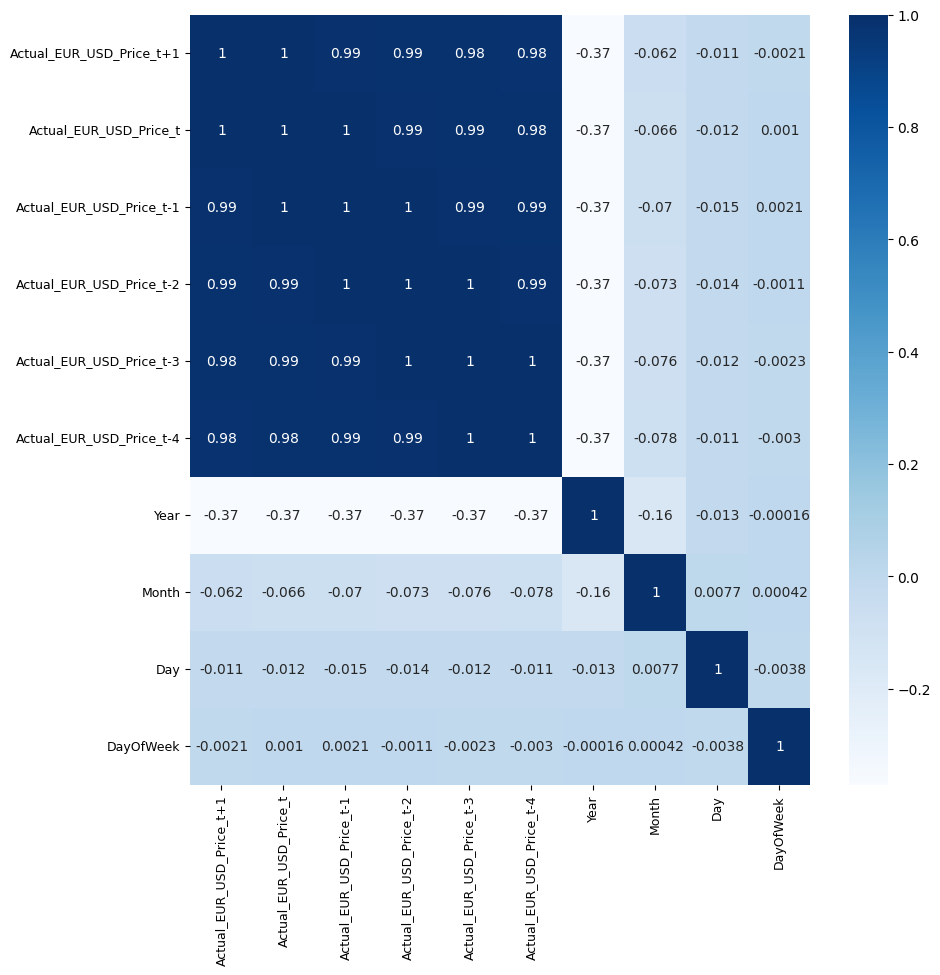

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt


columns_of_interest = [col for col in df_oil_currency.columns if col.startswith('Actual_EUR_USD_Price_t-') ]
columns_of_interest.insert(0,'Actual_EUR_USD_Price_t+1')
columns_of_interest.insert(1,'Actual_EUR_USD_Price_t')
columns_of_interest.extend(['Year','Month','Day','DayOfWeek'])
corr = df_oil_currency[columns_of_interest].corr()
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr,   annot=True,cmap='Blues')
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)

plt.show()


# Corealtion Matrix for Oil and its lagged feature

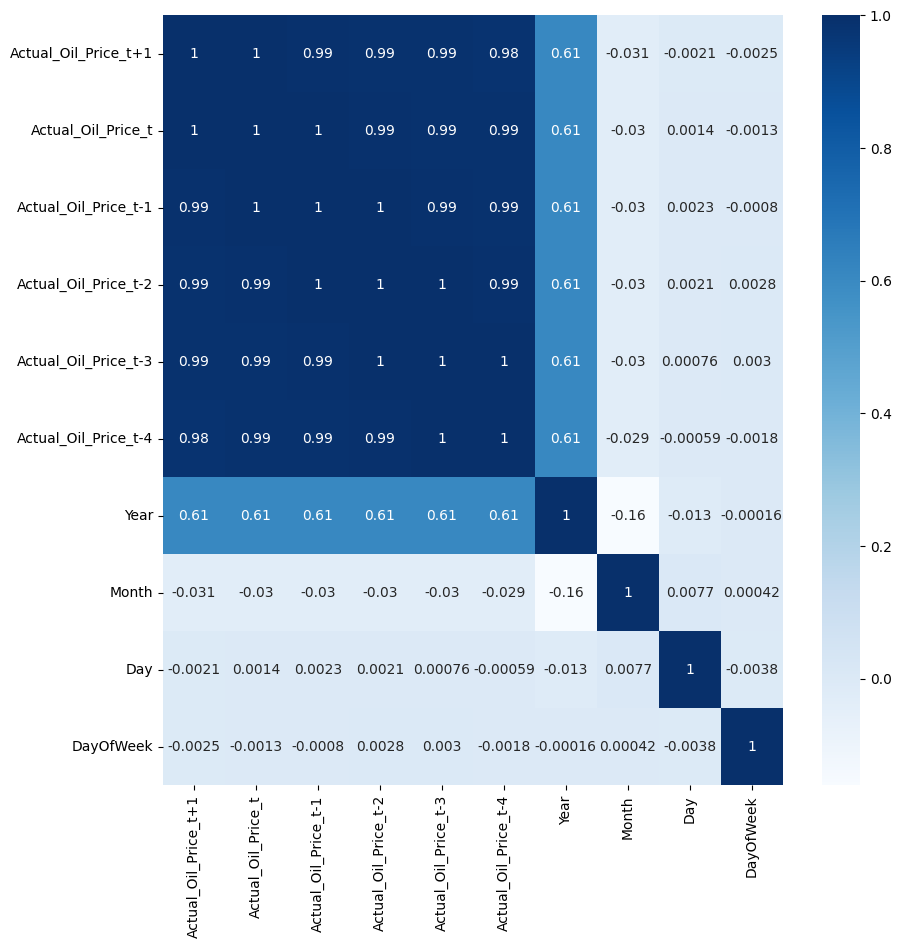

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

columns_of_interest = [col for col in df_oil_currency.columns if col.startswith('Actual_Oil_Price_t-') ]
columns_of_interest.insert(0,'Actual_Oil_Price_t+1')
columns_of_interest.insert(1,'Actual_Oil_Price_t')
columns_of_interest.extend(['Year','Month','Day','DayOfWeek'])
corr = df_oil_currency[columns_of_interest].corr()
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr,   annot=True,cmap='Blues')

plt.show()


#Removing the null rows created during shift operation

In [76]:
df_oil_currency.dropna(inplace=True)
df_oil_currency.tail(5)

,Actual_Oil_Price_t,Oil_Price_standardized,Actual_EUR_USD_Price_t,EUR_USD_Price_standardized,Actual_EUR_USD_Price_t-1,Actual_EUR_USD_Price_t-2,Actual_EUR_USD_Price_t-3,Actual_EUR_USD_Price_t-4,Actual_Oil_Price_t-1,Actual_Oil_Price_t-2,...,Actual_EUR_USD_Price_t+5,Actual_Oil_Price_t+1,Actual_Oil_Price_t+2,Actual_Oil_Price_t+3,Actual_Oil_Price_t+4,Actual_Oil_Price_t+5,Year,Month,Day,DayOfWeek
Date,,,,,,,,,,,,,,,,,,,,,
2023-06-26,74.65,0.210361,1.090667,-0.502253,1.095890,1.099264,1.092037,1.092430,74.14,76.83,...,1.090750,75.15,74.38,74.34,76.14,76.12,2023,6,26,0
2023-06-27,75.15,0.233028,1.091048,-0.495679,1.090667,1.095890,1.099264,1.092037,74.65,74.14,...,1.091310,74.38,74.34,76.14,76.12,76.18,2023,6,27,1
2023-06-28,74.38,0.198121,1.095722,-0.415001,1.091048,1.090667,1.095890,1.099264,75.15,74.65,...,1.088495,74.34,76.14,76.12,76.18,76.61,2023,6,28,2
2023-06-29,74.34,0.196308,1.091584,-0.486431,1.095722,1.091048,1.090667,1.095890,74.38,75.15,...,1.085658,76.14,76.12,76.18,76.61,77.56,2023,6,29,3
2023-06-30,76.14,0.277908,1.086803,-0.568949,1.091584,1.095722,1.091048,1.090667,74.34,74.38,...,1.089064,76.12,76.18,76.61,77.56,78.43,2023,6,30,4


#Writing back file so that it can be use directly by multiple algorithms


In [77]:
df_oil_currency.to_csv("/content/drive/MyDrive/dissertation/df_oil_currency.csv")